# Protein Consumption - Hierarchical Clustering
- Author: Oliver Mueller
- Last update: 26.01.2024

## Initialize notebook
Load required packages. Set up workspace, e.g., set theme for plotting and initialize the random number generator.

In [35]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [3]:
plt.style.use('fivethirtyeight')

## Problem description

We have data about the protein consumption in twenty-five European countries for nine food groups. We want to find out whether there are any groups of countries with similar protein consumption patterns. 

## Load data

In [4]:
data = pd.read_csv('data/protein.txt', sep='\t')

In [5]:
data.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## Prepare data

Drop the catgeorical variable `Country` and scale the data.

In [6]:
data_prep = data.drop(['Country'], axis=1) 

In [7]:
scaler = StandardScaler()
data_prep = scaler.fit_transform(data_prep)
data_prep = pd.DataFrame(data_prep, columns=data.columns[1:])

In [8]:
data_prep.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


## Hierarchical clustering

In [31]:
hclust = linkage(data_prep, method="complete", metric="euclidean")

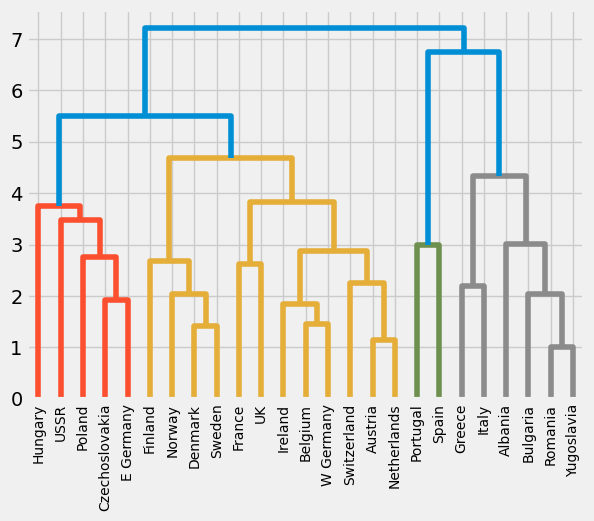

In [33]:
dendrogram(hclust, , labels=data['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [40]:
cluster_membership = fcluster(hclust, t=5, criterion='maxclust')

In [42]:
cluster_membership

array([5, 3, 3, 5, 1, 2, 1, 2, 3, 5, 1, 3, 5, 3, 2, 1, 4, 5, 4, 2, 3, 3,
       1, 3, 5], dtype=int32)

In [41]:
data['Cluster'] = cluster_membership
data = data.sort_values('Cluster')

In [43]:
data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
15,Poland,6.9,10.2,2.7,19.3,3.0,36.1,5.9,2.0,6.6,1
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
10,Hungary,5.3,12.4,2.9,9.7,0.3,40.1,4.0,5.4,4.2,1
19,Sweden,9.9,7.8,3.5,24.7,7.5,19.5,3.7,1.4,2.0,2
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
14,Norway,9.4,4.7,2.7,23.3,9.7,23.0,4.6,1.6,2.7,2
20,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9,3
